In [1]:
%conda install -c conda-forge pandas-profiling

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle
%matplotlib inline

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

#Remove Serial Number
data.drop('sl_no', axis=1, inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
report = data.profile_report(title='Campus Placement Data')
report

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


In [7]:
# data cleaning
data['salary'].fillna(value=0, inplace=True)
print('Salary with missing value', data['salary'].isnull().sum(), sep='\n')

Salary with missing value
0


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


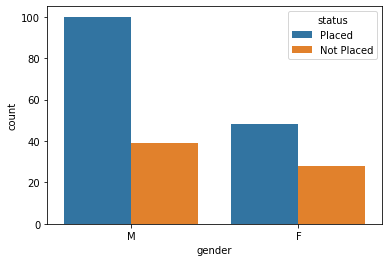

In [8]:
data.gender.value_counts()
sns.countplot('gender', hue='status', data=data)
plt.show()

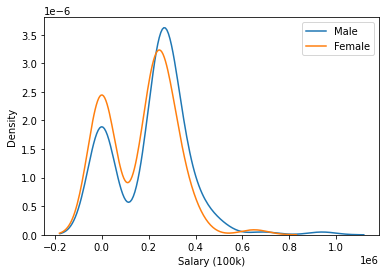

In [11]:
sns.kdeplot(data.salary[data.gender == 'M'])
sns.kdeplot(data.salary[data.gender == 'F'])
plt.legend(['Male', 'Female'])
plt.xlabel('Salary (100k)')
plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


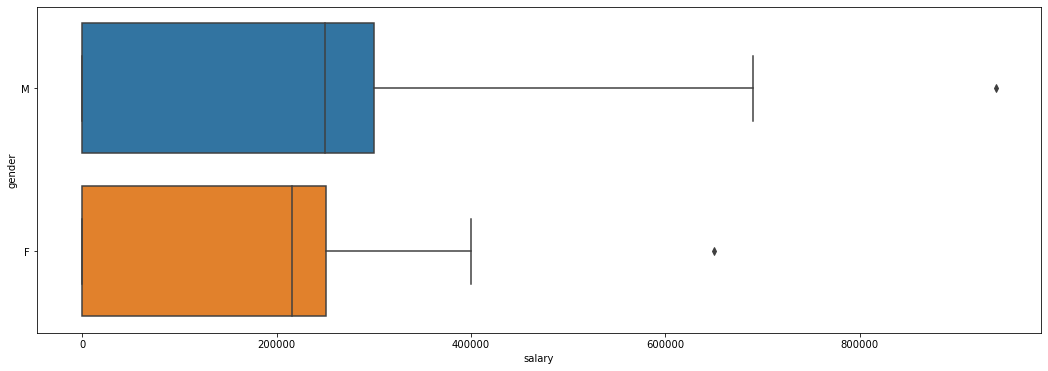

In [12]:
plt.figure(figsize=(18,6))
sns.boxplot('salary', 'gender', data=data)
plt.show()

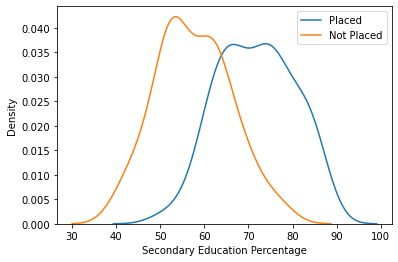

In [13]:
sns.kdeplot(data.ssc_p[data.status=='Placed'])
sns.kdeplot(data.ssc_p[data.status=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('Secondary Education Percentage')
plt.show()


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


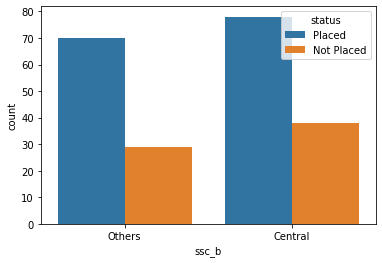

In [14]:
sns.countplot('ssc_b', hue='status', data=data)
plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


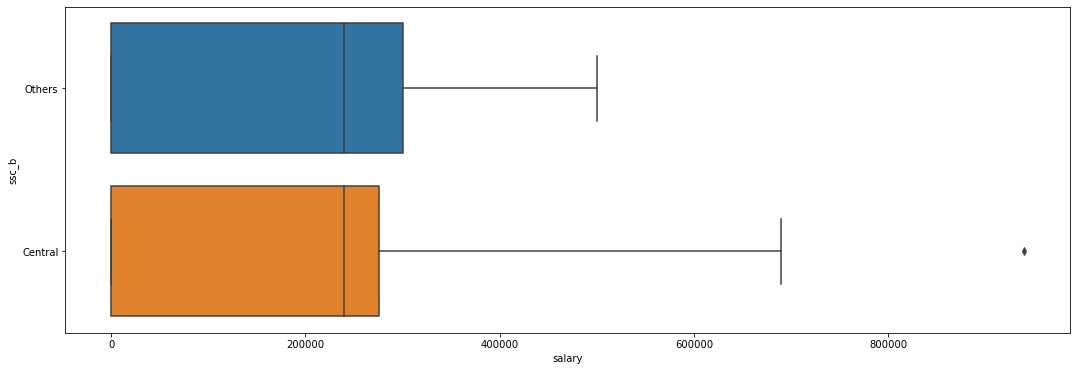

In [15]:
plt.figure(figsize=(18, 6))
sns.boxplot('salary', 'ssc_b', data=data)
plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


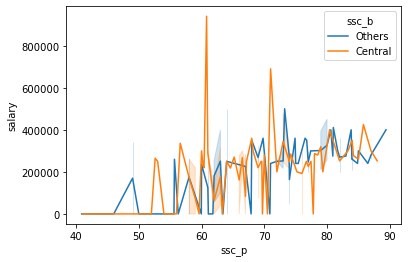

In [16]:
sns.lineplot('ssc_p', 'salary', hue='ssc_b', data=data)
plt.show()

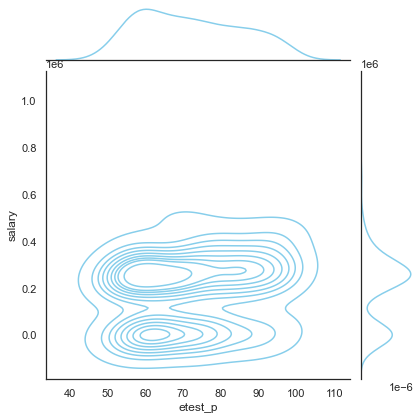

In [17]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.set(style='white', color_codes=True)
sns.jointplot(x=data['etest_p'], y=data['salary'], kind='kde', color='skyblue')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

data.status[data.status == 0].count()

67

In [20]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
Y = data['status']



In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [23]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8307692307692308
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.87      0.89      0.88        45

    accuracy                           0.83        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



In [31]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [33]:
#Using Logistic Regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)
y_pred = LogR.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [34]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))